In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np

# import matplotlib.cm as cm
# import matplotlib.colors as colors
# import random
# from random import sample
# from matplotlib.lines import Line2D
# import matplotlib.patches as patches
# from matplotlib.patches import Rectangle
# import seaborn as sns
# import matplotlib.image as mpimg

# from cProfile import label
# from mpl_toolkits.mplot3d import Axes3D
# from IPython.display import IFrame, display, Image

# np.set_printoptions(suppress=True)

In [3]:
# from shapely.geometry import Point, MultiPoint
# from shapely.ops import nearest_points

In [4]:
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

/var/folders/w_/w1t73xzx35j4jtrj94fjskj80000gn/T/ipykernel_25502/3210477311.py:2: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(log_console=True, use_cache=True)


'1.6.0'

# 1. Download and Load OpenStreetMap Street Network Data

In [5]:
# # Create a filter to query OSM for the specified network type.
# ox.downloader._get_osm_filter('drive')

In [6]:
# cf = '["highway"]["area"!~"yes"]["access"!~"private"]["highway"!~"abandoned|construction|planned|platform|proposed|raceway|service|path|steps|footway"]["service"!~"private"]'
cf = '["highway"]["area"!~"yes"]["access"!~"private"]["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link|tertiary|tertiary_link|road"]'

In [7]:
# G = ox.graph_from_point(location_point, dist=300, dist_type="bbox", custom_filter=cf)
G = ox.graph_from_place('Overijssel', network_type='drive', custom_filter=cf)

In [8]:
G = ox.project_graph(G, to_crs="EPSG:3857")

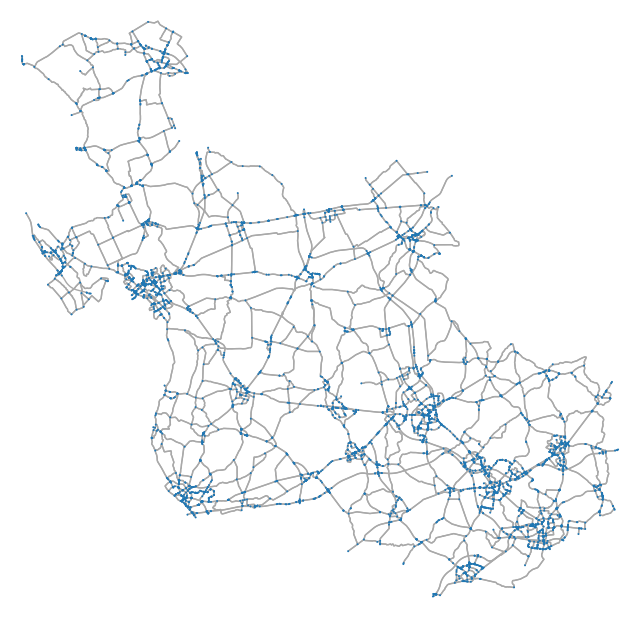

In [9]:
fig, ax = ox.plot_graph(G, node_size=2, node_color='tab:blue', edge_linewidth=1, edge_color= 'darkgray', figsize=(8,8), bgcolor='white')
# n_ped.plot(ax=ax, markersize=45, zorder=5, c=colors)
# e_ped.plot(ax=ax, color='darkgray', linewidth=3, zorder=0)
# bgcolor= 'w', node_color='w', node_edgecolor='k', node_size=35, 
#                            node_zorder=3, edge_color=ec, edge_linewidth=3
# fig.savefig('./notebook_figures/G.eps',format='eps', dpi=1000,bbox_inches="tight")
# fig.savefig("./notebook_figures/G.png", format = 'png', dpi= 1000, bbox_inches="tight")

In [10]:
# consolidate intersection to further simplify the topography of the graph
G_base = ox.consolidate_intersections(G, tolerance=100, rebuild_graph=True, dead_ends=False)

/Users/wenyuc/opt/anaconda3/envs/bioze/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


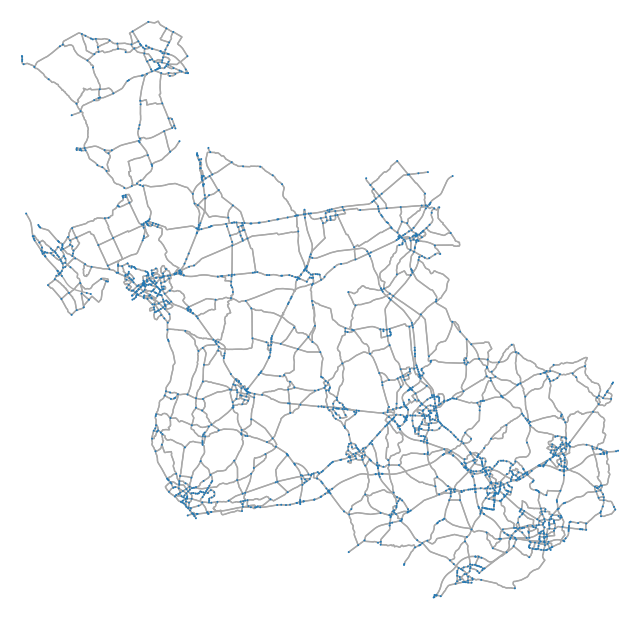

In [11]:
fig, ax = ox.plot_graph(G_base, node_size=2, node_color='tab:blue', edge_linewidth=1, edge_color= 'darkgray', figsize=(8,8), bgcolor='white')
# fig.savefig('./notebook_figures/G_base.eps',format='eps', dpi=1000, bbox_inches="tight")
# fig.savefig("./G_base.png", format = 'png', dpi= 1000, bbox_inches="tight") #transparent=True

In [12]:
print(len(G_base.nodes), len(G.nodes))

1972 5590


In [17]:
ox.save_graphml(G_base, filepath="./osm_network/G_base", gephi=True)

In [18]:
# save graph as a geopackage
ox.save_graph_geopackage(G_base, filepath="./osm_network/G_base.gpkg")

In [13]:
n, e = ox.graph_to_gdfs(G_base)

In [14]:
n["geometry"].to_file("./osm_network/G_base_nodes.shp")

In [21]:
n[["geometry", "y", "x", "lon", "lat", "highway"]].to_file("./osm_network/G_base_nodes_complete.shp")

In [15]:
# Convert lists to strings
e['highway'] = e['highway'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
e[["geometry","highway"]].to_file("./osm_network/G_base_edges.shp")

In [24]:
e

osmid   lanes  \
u    v    key                                                              
0    1    0                                             16313405       2   
     2    0                               [22958142, 1125474279]  [1, 2]   
1    0    0                                             16313405       2   
     466  0                              [1125249592, 176869602]  [1, 2]   
2    3    0                                             91571396       1   
...                                                          ...     ...   
1969 1849 0                                            986985863     NaN   
     1843 0                                              6513860       2   
1970 1660 0                                           1117609263       2   
     1933 0    [1117638319, 1117638293, 1117638326, 111763832...       1   
1971 1794 0                    [1118900488, 6512481, 1118762986]       2   

                ref                                            name  \
u    v    key                                                         
0    1    0    N350                                 Rijssensestraat   
     2    0    N350                                 Rijssensestraat   
1    0    0    N350                                 Rijssensestraat   
     466  0    N350                                 Rijssensestraat   
2    3    0     A35                                             NaN   
...             ...                                             ...   
1969 1849 0     NaN                                       Schansweg   
     1843 0     NaN                                       Schansweg   
1970 1660 0     NaN                                       Frieseweg   
     1933 0     NaN  [Frieseweg, Ingenieur B.P.G. van Diggelenkade]   
1971 1794 0    N375                                       Zomerdijk   

                     highway  maxspeed  oneway reversed       length  \
u    v    key                                                          
0    1    0          primary        80   False     True   274.047000   
     2    0          primary        80    True    False   666.290323   
1    0    0          primary        80   False    False   274.047000   
     466  0          primary        80    True    False   481.025473   
2    3    0    motorway_link       130    True    False   965.384633   
...                      ...       ...     ...      ...          ...   
1969 1849 0        secondary        50   False    False   470.737235   
     1843 0        secondary        50   False     True  1148.347639   
1970 1660 0        secondary        80   False    False   342.260483   
     1933 0        secondary  [80, 50]    True    False   287.683000   
1971 1794 0          primary        80   False     True  3191.394699   

                                                        geometry   u_original  \
u    v    key                                                                   
0    1    0    LINESTRING (732329.118 6863326.894, 732282.965...     29092110   
     2    0    LINESTRING (732329.118 6863326.894, 732424.976...     29092110   
1    0    0    LINESTRING (732029.302 6862992.539, 732169.520...   1873507619   
     466  0    LINESTRING (732029.302 6862992.539, 731998.678...   1873507619   
2    3    0    LINESTRING (732826.405 6863768.536, 732776.088...     29092113   
...                                                          ...          ...   
1969 1849 0    LINESTRING (681955.574 6942672.304, 682019.811...   9122951053   
     1843 0    LINESTRING (681955.574 6942672.304, 681891.337...   9122951050   
1970 1660 0    LINESTRING (659049.056 6902745.508, 659051.661...  10221610393   
     1933 0    LINESTRING (659049.056 6902745.508, 659045.939...  10221610393   
1971 1794 0    LINESTRING (685274.325 6926185.806, 685194.843...  10233013463   

                v_original bridge width tunnel junction est_width access  
u    v    key                                                             
0    

In [25]:
# Load the Twente Boundary shapefile
shapefile_path = '/Users/wenyuc/Desktop/UT/bioze_digital_mapping_tool/data/Twente_boundaries/Boundaries_Twente.shp'
twente = gpd.read_file(shapefile_path)

In [30]:
twente = twente.to_crs(epsg=3857)

In [34]:
# Clip the graph to the polygon
road = nx.Graph()

In [48]:
clipped_graph = ox.graph_from_gdfs(
    nodes=twente,
    edges=G_base.edges(keys=True, data=True),
    retain_all=True,
    graph_type=nx.MultiDiGraph(),
)

TypeError: graph_from_gdfs() got an unexpected keyword argument 'nodes'

In [32]:
from shapely.geometry import Point

In [35]:
for node, data in G_base.nodes(data=True):
    x = data['x']
    y = data['y']
    node_point = Point(x, y)
    if any(twente.geometry.contains(node_point)):
        road.add_node(node, **data)  # Add nodes within the polygon

In [43]:
# Add edges between nodes that are both within the polygon
for edge in G_base.edges(data=True):
    start_node, end_node, edge_data = edge[0], edge[1], edge[2]
    if start_node in road.nodes() and end_node in road.nodes():
        road.add_edge(start_node, end_node, **edge_data)

In [44]:
road

KeyError: 'crs'

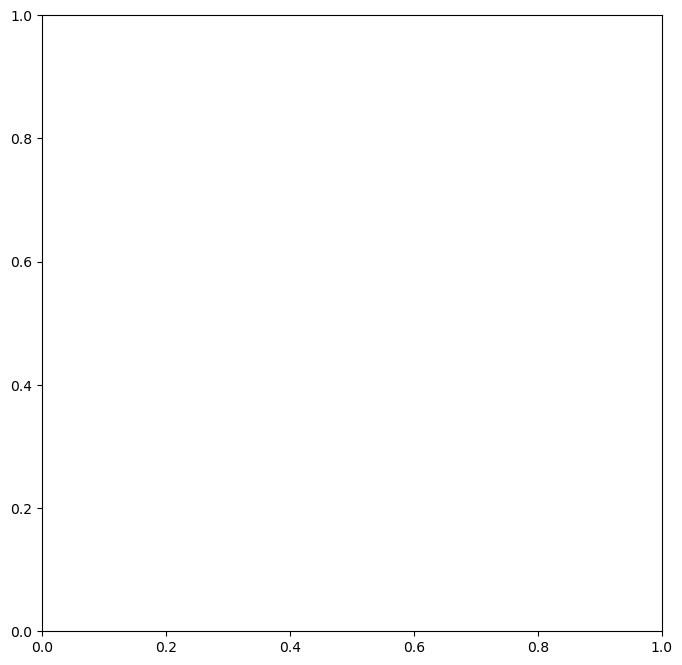

In [46]:
fig, ax = ox.plot_graph(road, node_size=2, node_color='tab:blue', edge_linewidth=1, edge_color= 'darkgray', figsize=(8,8), bgcolor='white')